## **A Detailed View to MNIST Classification**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten,Dense
from keras.layers import Dropout

In [ ]:
#Load the MNIST data

(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
#To scale the values 

X_train = X_train/255
X_test = X_test/255

**1.1 Fully connected net with five hidden layers each of which is with 1024 hidden units**

In [ ]:
model = Sequential()

Input = model.add(Flatten(input_shape=(28,28)))
Hidden_layer1 = model.add(Dense(1024,activation='relu'))
Hidden_layer2 = model.add(Dense(1024,activation='relu'))
Hidden_layer3 = model.add(Dense(1024,activation='relu'))
Hidden_layer4 = model.add(Dense(1024,activation='relu'))
Hidden_layer5 = model.add(Dense(1024,activation='relu'))
Output = model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
#Training the model

model_train = model.fit(X_train,y_train,batch_size=128,epochs=24,verbose=1,validation_split=0.2)

Epoch 1/24
375/375 [==============================] - 30s 79ms/step - loss: 0.2517 - accuracy: 0.9240 - val_loss: 0.1251 - val_accuracy: 0.9640
Epoch 2/24
375/375 [==============================] - 29s 76ms/step - loss: 0.1040 - accuracy: 0.9704 - val_loss: 0.1168 - val_accuracy: 0.9673
Epoch 3/24
375/375 [==============================] - 29s 78ms/step - loss: 0.0783 - accuracy: 0.9772 - val_loss: 0.1052 - val_accuracy: 0.9707
Epoch 4/24
375/375 [==============================] - 28s 75ms/step - loss: 0.0556 - accuracy: 0.9836 - val_loss: 0.1096 - val_accuracy: 0.9718
Epoch 5/24
375/375 [==============================] - 28s 75ms/step - loss: 0.0457 - accuracy: 0.9860 - val_loss: 0.1088 - val_accuracy: 0.9735
Epoch 6/24
375/375 [==============================] - 28s 75ms/step - loss: 0.0442 - accuracy: 0.9875 - val_loss: 0.1164 - val_accuracy: 0.9711
Epoch 7/24
375/375 [==============================] - 28s 74ms/step - loss: 0.0367 - accuracy: 0.9898 - val_loss: 0.1159 - val_accuracy:

**1.2 Test accuracy result is 98.09%**

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1358 - accuracy: 0.9809


[0.13580872118473053, 0.98089998960495]

In [ ]:
model.predict(X_test)

array([[1.8704180e-33, 5.2082575e-23, 5.9012461e-19, ..., 1.0000000e+00,
        6.9421678e-23, 1.6211908e-17],
       [1.5417193e-25, 1.7771206e-20, 1.0000000e+00, ..., 6.2517432e-20,
        1.6294555e-17, 1.2719365e-28],
       [5.8841143e-35, 1.0000000e+00, 3.6585338e-29, ..., 3.4834457e-34,
        2.3513649e-22, 1.3022258e-25],
       ...,
       [1.5935439e-17, 4.7076806e-13, 9.6677860e-14, ..., 4.1508724e-12,
        8.0539924e-12, 7.4135958e-10],
       [1.4551206e-13, 4.1055804e-20, 6.7976515e-21, ..., 1.2836820e-16,
        7.6866797e-09, 2.5490359e-14],
       [5.6222656e-29, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.6546267e-28, 0.0000000e+00]], dtype=float32)

**1.3 Feedforward step on 1000 test samples**

In [ ]:
x_test_2 = X_test[:1000]
y_test_2 = y_test[:1000]

In [ ]:
#10-dim probability vector per sample

model.predict(np.expand_dims(x_test_2[0],axis=0)).shape

(1, 10)

In [ ]:
predictions = np.argmax(model.predict(x_test_2), axis=1)

In [ ]:
#1000 predictions 

predictions

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4,
       8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 6, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6,
       5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5,
       1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7,
       1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6,
       4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5,
       7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9,
       8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7,
       9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2,
       6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4,

In [ ]:
prediction_indices = []
for i in range(10):
    prediction_indices.append(np.ndarray.tolist((np.where(predictions == i)[0][:10])))
print(prediction_indices)

[[3, 10, 13, 25, 28, 55, 69, 71, 101, 126], [2, 5, 14, 29, 31, 37, 39, 40, 46, 57], [1, 35, 38, 43, 47, 72, 77, 82, 106, 119], [18, 30, 32, 44, 51, 63, 68, 76, 87, 90], [4, 6, 19, 24, 27, 33, 42, 48, 49, 56], [8, 15, 23, 45, 52, 53, 59, 102, 120, 127], [11, 21, 22, 50, 54, 66, 81, 88, 91, 98], [0, 17, 26, 34, 36, 41, 60, 64, 70, 75], [61, 84, 110, 128, 134, 146, 177, 179, 181, 184], [7, 9, 12, 16, 20, 58, 62, 73, 78, 92]]


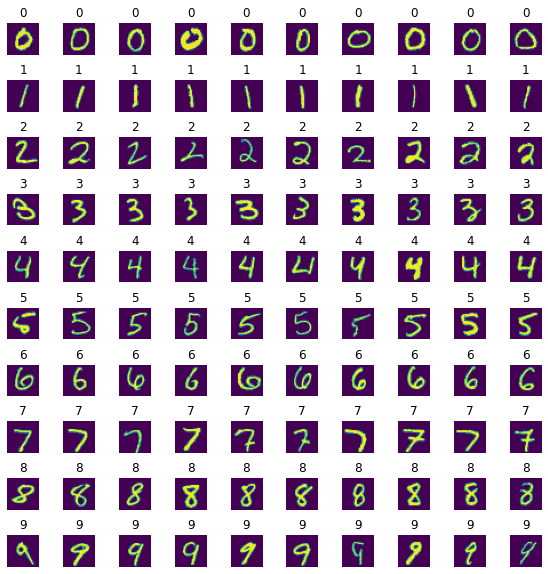

In [ ]:
#10 * 10 grid of subplots 

num_rows, num_cols = 10, 10
fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,10),gridspec_kw={'wspace':0.01, 'hspace':0.8}, squeeze = True)
for r in range(num_rows):
    for c in range(num_cols):
        ax[r,c].axis("off")
        image_index = prediction_indices[r][c]
        ax[r,c].imshow(x_test_2[image_index])
        ax[r,c].set_title(predictions[image_index])
plt.show()

**1.4 Repeating the procedure for second to the last layer output**

In [ ]:
Hidden_output_model = keras.Model(model.input, model.get_layer(index = 3).output)

In [ ]:
Hidden_output = Hidden_output_model.predict(x_test_2)

In [ ]:
#1024-dim vector 

Hidden_output.shape

(1000, 1024)

In [ ]:
#10 random dimensions 

np.random.seed(10)
ten_dim = np.random.randint(1024,size=10)
print(ten_dim)

[265 125 996 527 320 369 123 156 985 733]


In [ ]:
layer5_output = Hidden_output[:, ten_dim]
labels = np.argmax( layer5_output , axis= 1)
labels

array([0, 2, 4, 7, 0, 4, 0, 9, 0, 9, 7, 1, 9, 7, 4, 1, 9, 0, 9, 0, 9, 1,
       1, 1, 0, 7, 0, 0, 7, 4, 9, 4, 9, 0, 0, 2, 0, 4, 2, 4, 4, 0, 0, 2,
       9, 1, 4, 2, 0, 0, 1, 9, 1, 1, 1, 7, 0, 4, 9, 1, 0, 0, 9, 9, 9, 0,
       1, 0, 9, 7, 0, 7, 2, 0, 4, 0, 9, 2, 9, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       1, 4, 9, 1, 9, 9, 4, 0, 4, 9, 1, 9, 1, 7, 1, 0, 9, 9, 2, 4, 9, 0,
       0, 9, 9, 9, 0, 0, 0, 0, 9, 2, 1, 0, 0, 1, 0, 9, 7, 1, 0, 1, 1, 1,
       1, 0, 0, 4, 7, 0, 1, 0, 1, 0, 9, 4, 9, 4, 0, 2, 7, 0, 9, 0, 1, 1,
       4, 1, 1, 7, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 4, 0, 0, 0, 2, 9, 2, 9,
       4, 0, 4, 0, 4, 0, 1, 7, 0, 9, 2, 1, 7, 4, 0, 4, 7, 9, 7, 9, 4, 1,
       0, 2, 9, 1, 4, 4, 4, 9, 9, 1, 2, 9, 0, 1, 9, 9, 9, 7, 9, 1, 1, 1,
       4, 2, 2, 0, 4, 2, 0, 0, 4, 0, 9, 9, 0, 0, 9, 9, 2, 2, 0, 4, 1, 9,
       0, 0, 2, 9, 7, 2, 0, 2, 0, 4, 9, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0,
       9, 4, 0, 4, 0, 7, 9, 7, 4, 9, 9, 0, 4, 0, 2, 4, 2, 9, 0, 1, 9, 2,
       1, 0, 0, 1, 0, 2, 9, 2, 7, 0, 7, 7, 2, 0, 0,

In [ ]:
layer5_output_index = []
for i in range(10):
    layer5_output_index.append(np.where(labels == i)[0][:10])
print(layer5_output_index)

[array([ 0,  4,  6,  8, 17, 19, 24, 26, 27, 33]), array([11, 15, 21, 22, 23, 45, 50, 52, 53, 54]), array([  1,  35,  38,  43,  47,  72,  77,  82, 106, 119]), array([], dtype=int64), array([ 2,  5, 14, 29, 31, 37, 39, 40, 46, 57]), array([], dtype=int64), array([], dtype=int64), array([  3,  10,  13,  25,  28,  55,  69,  71, 101, 126]), array([], dtype=int64), array([ 7,  9, 12, 16, 18, 20, 30, 32, 44, 51])]


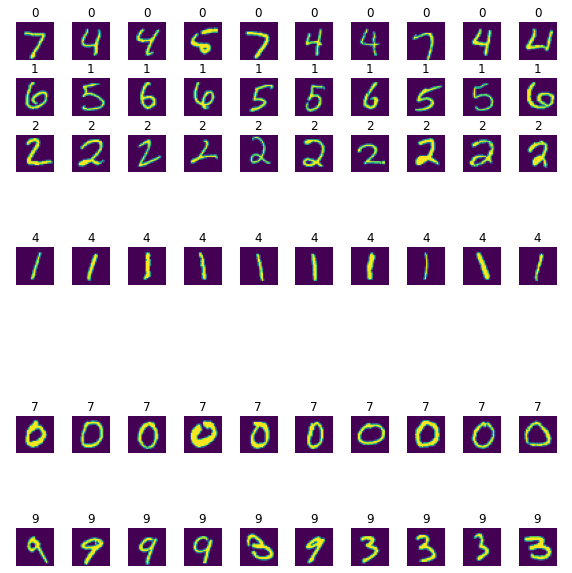

In [ ]:
num_rows, num_cols = 10, 10
fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,10),gridspec_kw={'wspace':0.01, 'hspace':0.5}, squeeze = True)
for r in range(num_rows):
    for c in range(num_cols):
        ax[r,c].axis("off")
        if c < len(layer5_output_index[r]):
          image_index = layer5_output_index[r][c]
          ax[r,c].imshow(x_test_2[image_index])
          ax[r,c].set_title(labels[image_index])
plt.show()


**In 1.3, the features are correctly classified as we have the softmax output layer where as in 1.4, where we have captured the output from the second to the last layer, we have selected 10 random features out of 1024 dimensional vector and this lead to the output where there are some rows that are empty or not with enough number of images as the random features which we have selected might not be able to classify the images into the required classes. The ideal solution for which the images can be properly classified is better feature seperation in the last hidden layer.** 

**1.5 to 1.8, Capturing the output of all the layers and checking out the classification by doing tSNE and PCA on 1000 test samples**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
layer0_output = np.reshape(x_test_2,(1000,784))
sample_label = np.reshape(y_test_2,(1000,))

In [ ]:
#Capturing the output of all the layers

Input_layer = keras.Model(model.input, model.get_layer(index = 0).output)
Hidden_output_layer1 = keras.Model(model.input, model.get_layer(index = 1).output)
Hidden_output_layer2 = keras.Model(model.input, model.get_layer(index = 2).output)
Hidden_output_layer3 = keras.Model(model.input, model.get_layer(index = 3).output)
Hidden_output_layer4 = keras.Model(model.input, model.get_layer(index = 4).output)
Hidden_output_layer5 = keras.Model(model.input, model.get_layer(index = 5).output)
output_layer = keras.Model(model.input, model.get_layer(index = 6).output)

In [ ]:
layer_input = Input_layer.predict(x_test_2)
layer1_output = Hidden_output_layer1.predict(x_test_2)
layer2_output = Hidden_output_layer2.predict(x_test_2)
layer3_output = Hidden_output_layer3.predict(x_test_2)
layer4_output = Hidden_output_layer4.predict(x_test_2)
layer_output= output_layer.predict(x_test_2)

In [ ]:
#defining PCA for classification

def pca(layer_name):
  scaler = StandardScaler()
  #scaled_data = scaler.fit_transform(layer_name)
  x_pca = PCA(n_components=2).fit_transform(layer_name)
  #x_pca = PCA.fit_transform(scaled_data)
  fig= plt.figure(figsize=(10,10))
  figure=plt.scatter(x_pca[:, 0], x_pca[:, 1], c=sample_label, cmap='plasma')
  for i in range(10):
    x_pca0_mean = np.mean(np.take(x_pca[:, 0], np.where(sample_label == i)))
    x_pca1_mean = np.mean(np.take(x_pca[:, 1], np.where(sample_label == i)))
    plt.text(x_pca0_mean, x_pca1_mean, i, fontsize = 12, bbox=dict(boxstyle="round"))
    plt.legend(figure.legend_elements()[0], figure.legend_elements()[1])
  plt.show() 
  

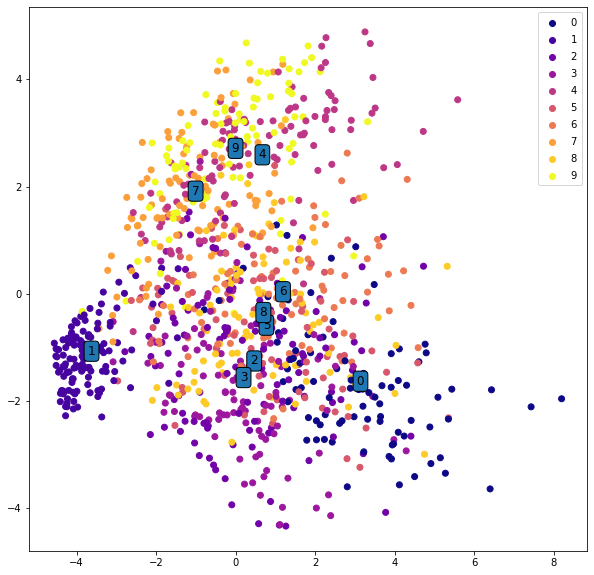

In [ ]:
pca(layer_input)

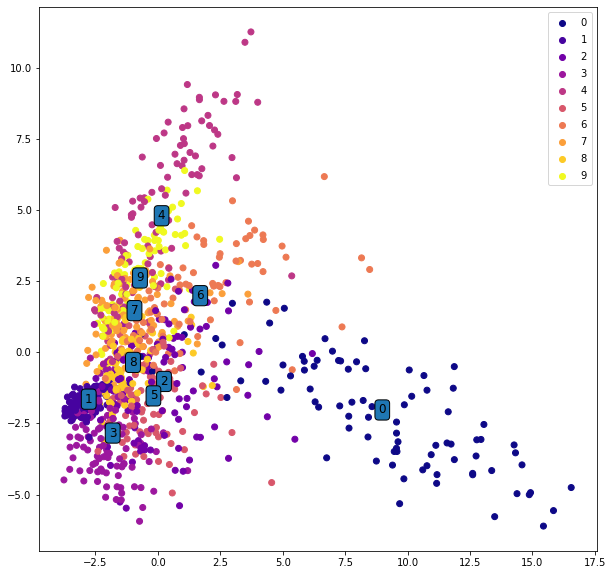

In [ ]:
pca(layer1_output)

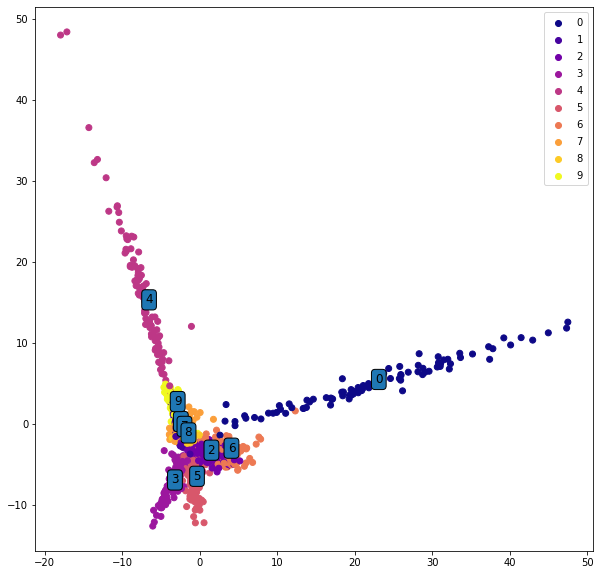

In [ ]:
pca(layer2_output)

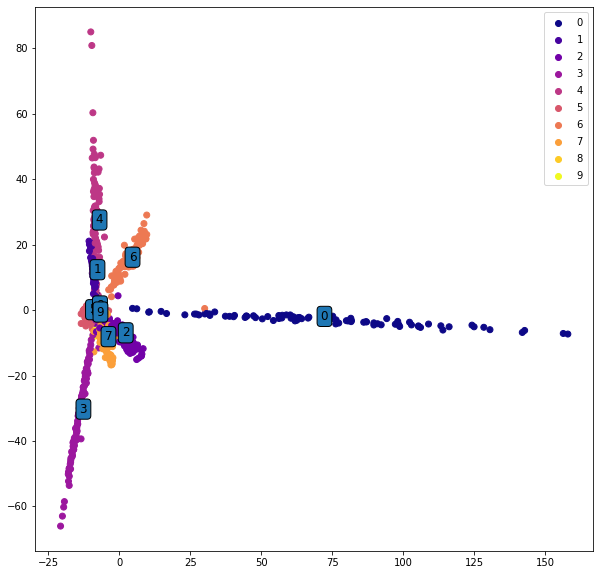

In [ ]:
pca(layer3_output)

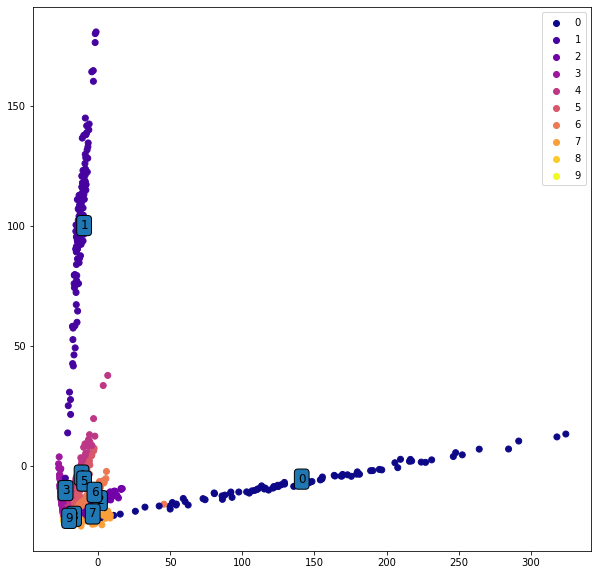

In [ ]:
pca(layer4_output)

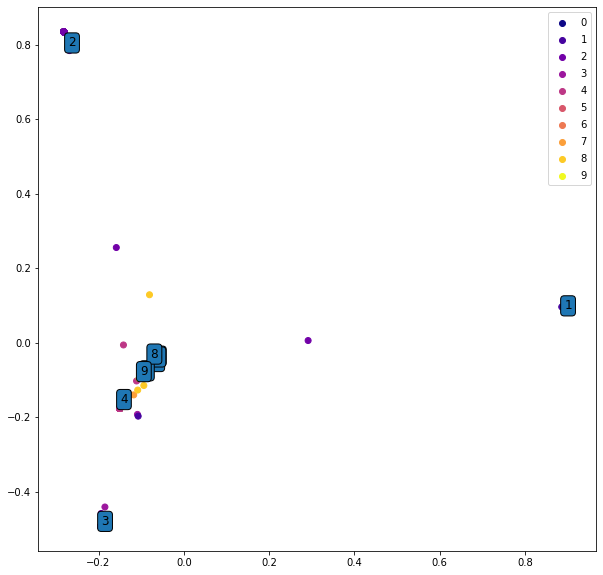

In [ ]:
pca(layer_output)

**From the above plots, it is clear that PCA is not able to properly classify the 10 classes.**

In [ ]:
#defining tSNE for classification

def tsne(layer_name):
  scaler = StandardScaler()
  x_tsne = TSNE(n_components=2).fit_transform(layer_name)
  fig= plt.figure(figsize=(10,10))
  figure=plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=sample_label, cmap='plasma')
  for i in range(10):
    x_pca0_mean = np.mean(np.take(x_tsne[:, 0], np.where(sample_label == i)))
    x_pca1_mean = np.mean(np.take(x_tsne[:, 1], np.where(sample_label == i)))
    plt.text(x_pca0_mean, x_pca1_mean, i, fontsize = 12, bbox=dict(boxstyle="round"))
    plt.legend(figure.legend_elements()[0], figure.legend_elements()[1])
  plt.show()
  

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


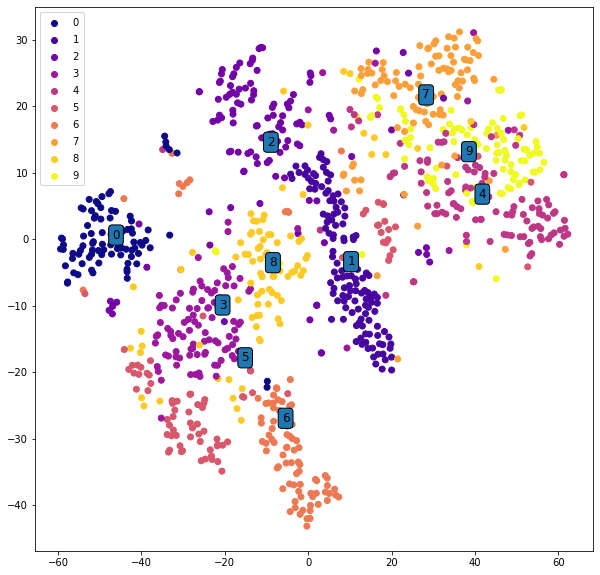

In [ ]:
tsne(layer_input)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


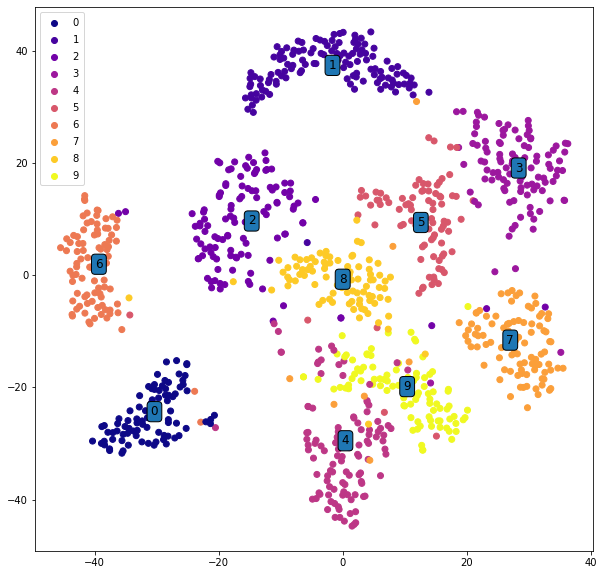

In [ ]:
tsne(layer1_output)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


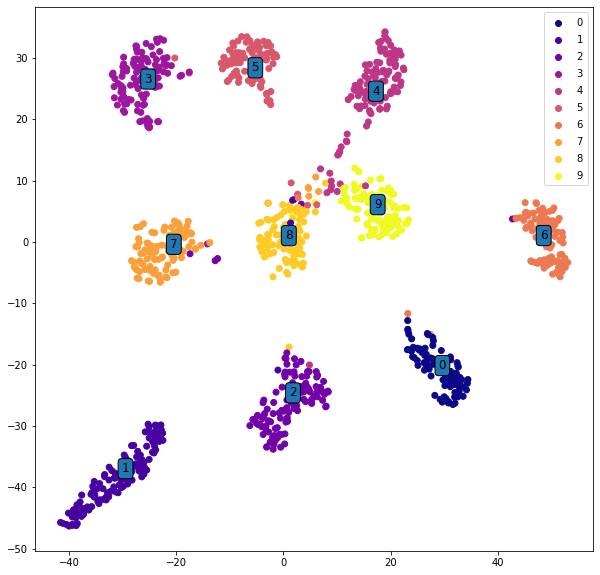

In [ ]:
tsne(layer2_output)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


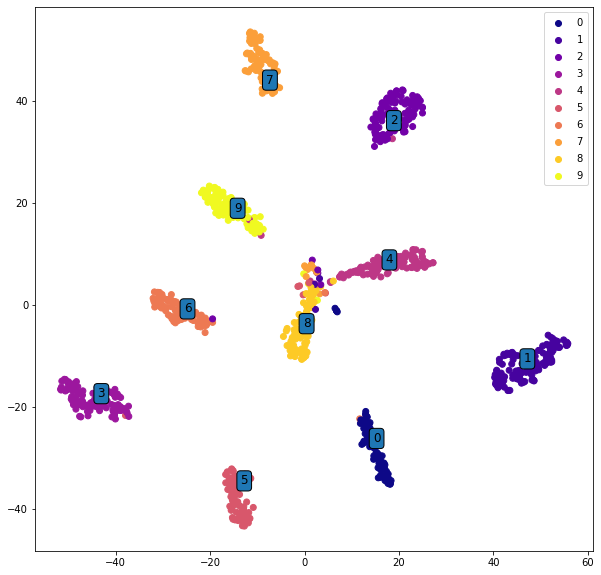

In [ ]:
tsne(layer3_output)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


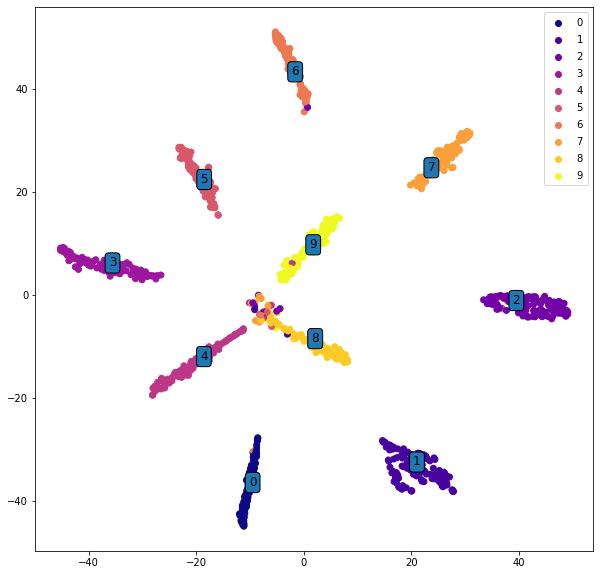

In [ ]:
tsne(layer4_output)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


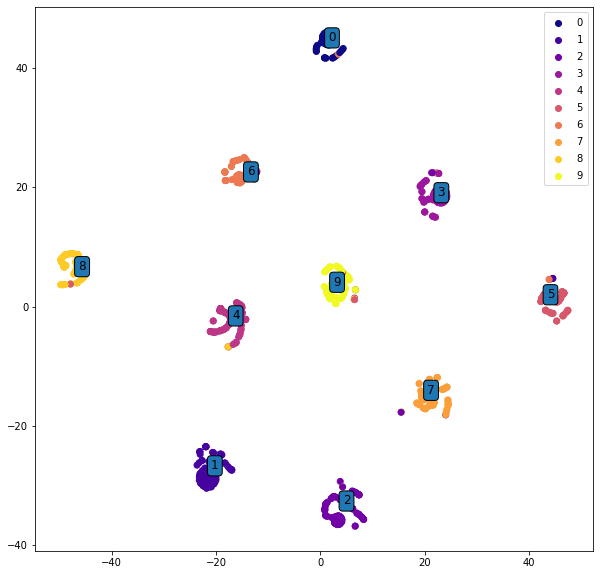

In [ ]:
tsne(layer_output)